## Problema 1

Considera un reactor de tanque perfectamente axitado que inicialmente contén 760 kg de solvente a 25 ºC. No tanque entran 12 kg/min de solvente a 5 ºC e sae o mesmo caudal que entra. A $$t=0$$ empeza a pasar vapor por un serpentín colocado dentro do tanque axitado. A calor subministrada polo vapor ven dada por:
$$
\dot{Q} = UA \left ( T_S - T \right )
$$
onde $UA$ é o coeficiente global de transmisión de calor multiplicado pola área do serpentín a través do cal pasa o vapor e $T_S$ é a temperatura do vapor, que ten un valor de 150 ºC. $UA$ = 111.5 kJ·min<sup>-1</sup>·K<sup>-1</sup>. A capacidade calorífica específica do solvente, $C_P$ = 2.3 kJ·kg<sup>-1</sup>·K<sup>-1</sup>.

1. Determina a temperatura do solvente despois de 50 minutos.
2. Determina a máxima temperatura que acada o solvente dentro do tanque.




In [6]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [2]:
# función de retorno de dT/dt
Tvapor = 150.0  # C
T0     = 2.0   # C
CP     = 2.3    # 
UA     = 111.5   # kJ/min/k
W      = 12.0 # kg/min
M      = 760.0  # kg

def modelo(t,T):
    dTdt = ( W * CP * (T0 - T ) + UA * (Tvapor - T) ) / ( M * CP )
    return dTdt

In [3]:
y0 = np.array([T0])
t0 = 0      # min
t_fin = 100   # min
t_span = np.array([t0,t_fin])
t_eval = np.linspace(t0,t_fin)

In [4]:
sol1 = solve_ivp(fun = modelo, t_span = t_span, y0 = y0, t_eval = t_eval)

Text(0.5, 1.0, 'Variación da temperatura tempo')

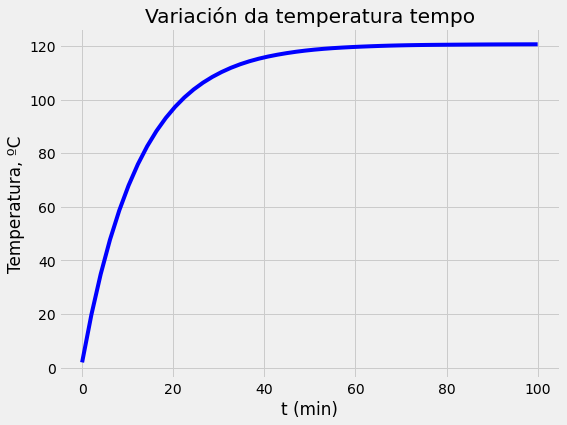

In [8]:
plt.figure(figsize=(8,6)) 
plt.style.use('fivethirtyeight')
plt.plot(sol1.t,sol1.y[0],'b-')
plt.xlabel('t (min)')
plt.ylabel('Temperatura, ºC')
plt.title('Variación da temperatura tempo')

## Problema 2

Unha reacción:
$$
A + 2B \rightarrow C
$$
ten como ecuación da velocidade de reacción a seguinte expresión:
$$
r_1=k_1C_AC_B
$$
Se supoñemos que a densidade do sistema reaccionante permanece constante, e que, iniciamente $k_1$ vale 0.1 L·mol<sup>-1</sup>·min<sup>-1</sup>, a concentración inicialde **A** é de 10M e a de **B** de 12M,  resolve o sistema de ecuación que resulta do balance de materia para cada unha das especies **A** e **B** e representa a variacón das concentración das dúas especies durante os primeis 5 minutos de reacción.

In [10]:
def reac(t,C):
  [C_A, C_B] = C
  dC_Adt = - k_1 * C[0] * C[1]
  dC_Bdt = 2 * k_1 * C[0] * C[1]
  return np.array([dC_Adt,dC_Bdt])

In [11]:
k_1  =  0.1 # L/mol/min
C_A0 = 10   # mol/L
C_B0 = 12   # mol/L
y0 = np.array([C_A0,C_B0])
t0 = 0      # min
t_fin = 5   # min
t_span = np.array([t0,t_fin])
t_eval = np.linspace(t0,t_fin)

In [12]:
sol2 = solve_ivp(fun = reac, t_span = t_span, y0 = y0, t_eval = t_eval)

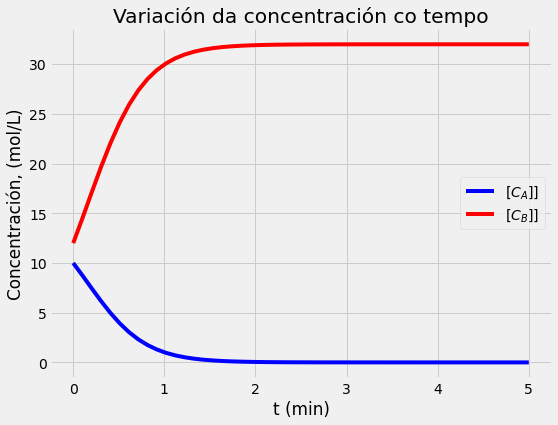

In [13]:
plt.figure(figsize=(8,6)) 
plt.style.use('seaborn-dark-palette')
plt.plot(sol2.t,sol2.y[0],'b-',sol2.t,sol2.y[1],'r-')
plt.xlabel('t (min)')
plt.ylabel('Concentración, (mol/L)')
plt.title('Variación da concentración co tempo')
plt.legend(['[$C_A$]]','[$C_B$]]'])

## Problema 3

Supón que a reacción elemental en fase líquida:
$$
A \xrightarrow{1} B \xrightarrow{2} C
$$
amosa as seguintes ecuacións de velocidade das reaccións:
$$
\begin{align*}
r_1 & = & k_1 C_A \\
r_2 & = & k_2 C_B^2
\end{align*}
$$
Supoñendo a densidade constante, o mesmo valor de $k_1$, 0.1 L·mol<sup>-1</sup>·min<sup>-1</sup> e un valor de $k_2$ 0.05 L·mol<sup>-1</sup>·min<sup>-1</sup>, a concentración inicial de **A** 10M e a de **B** 0M, resolve o sistema de ecuacións que resulta do balance de materia para cada unha das especies **A** e **B** e representa a variación das concentración das dúas especies durante os primeis 60 minutos de reacción.

In [14]:
def reac2(t,C):
  [C_A, C_B, C_C] = C
  dC_Adt = - k_1 * C[0]
  dC_Bdt =   k_1 * C[0] - k_2 * C[1]**2
  dC_Cdt =   k_2 * C[1]**2
  return np.array([dC_Adt,dC_Bdt,dC_Cdt])

In [15]:
k_1  =  0.1  # L/mol/min
k_2  =  0.05 # L/mol/min
C_A0 = 10.   # mol/L
C_B0 = 0.    # mol/L
C_C0 = 0.    # mol/L
y0 = np.array([C_A0,C_B0,C_C0])
t0 = 0      # min
t_fin = 60   # min
t_span = np.array([t0,t_fin])
t_eval = np.linspace(t0,t_fin)

In [16]:
sol3 = solve_ivp(fun = reac2, t_span = t_span, y0 = y0, t_eval = t_eval)

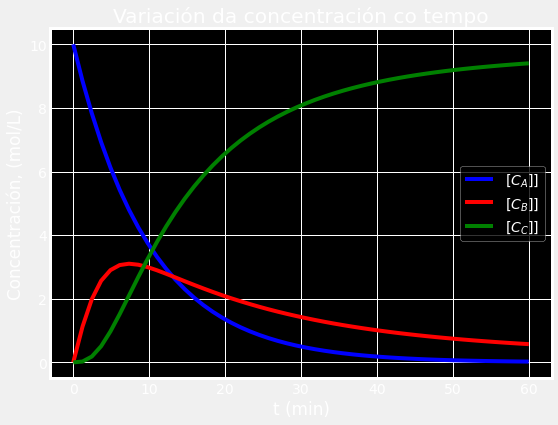

In [18]:
plt.figure(figsize=(8,6)) 
plt.style.use('dark_background')
plt.plot(sol3.t,sol3.y[0],'b-',sol3.t,sol3.y[1],'r-',sol3.t,sol3.y[2],'g')
plt.xlabel('t (min)')
plt.ylabel('Concentración, (mol/L)')
plt.title('Variación da concentración co tempo')
plt.legend(['[$C_A$]]','[$C_B$]]','[$C_C$]]'])

## Problema 4

Nun reactor discontinuo simple coas se producen as seguintes dúas reaccións elementais:
$$
\begin{align*}
A + B \rightarrow C \tag{1} \\ 
C + B \rightarrow D \tag{2}
\end{align*}
$$
onde:
$$
\begin{align*}
\frac { dC_A } { dt } = -r_{R_1} \tag{3} \\
\frac { dC_B } { dt } = -r_{R_1} - r_{R_2} \tag{4} \\
\frac { dC_C } { dt } = -r_{R_2} \tag{5} \\
\end{align*}
$$
con:
$$
\begin{align*}
r_{R_1} = k_1 C_A C_B \tag{6} \\
r_{R_2} = k_2 C_C C_B \tag{7}
\end{align*}
$$
onde $C_A(0)$ = $C_{A_0}$, $C_B(0) = C_{B_0}$, $C_C(0) = C_{C_0}$ e $C_D(0) = C_{D_0}$.

Resolve os balances de materia en réxime non estacionario e representa a variación das concentracións das especies frente a o tempo, para os primeiros 10 minutos de reacción, tendo en conta que $k_1$ = 1 L·mol<sup>-1</sup>·min<sup>-1</sup> , $k_2 = 0.5$ L·mol<sup>-1</sup>·min<sup>-1</sup> , $C_{A_0} = 1M$, $C_{B_0} = 2M$.

In [19]:
def reac3(t,C):
  [C_A, C_B, C_C, C_D] = C
  dC_Adt = - k_1 * C[0] * C[1]
  dC_Bdt = - k_1 * C[0] * C[1] - k_2 * C[2] * C[1]
  dC_Cdt =   k_1 * C[0] * C[1] - k_2 * C[1] * C[2]
  dC_Ddt =   k_2 * C[1] * C[2]
  return np.array([dC_Adt,dC_Bdt,dC_Cdt,dC_Ddt])

In [20]:
k_1  =  1.  # L/mol/min
k_2  =  0.5 # L/mol/min
C_A0 = 1.   # mol/L
C_B0 = 2.   # mol/L
C_C0 = 0.   # mol/L
C_D0 = 0.   # mol/L
y0 = np.array([C_A0,C_B0,C_C0,C_D0])
t0 = 0      # min
t_fin = 10   # min
t_span = np.array([t0,t_fin])
t_eval = np.linspace(t0,t_fin)

In [21]:
sol4 = solve_ivp(fun = reac3, t_span = t_span, y0 = y0, t_eval = t_eval)

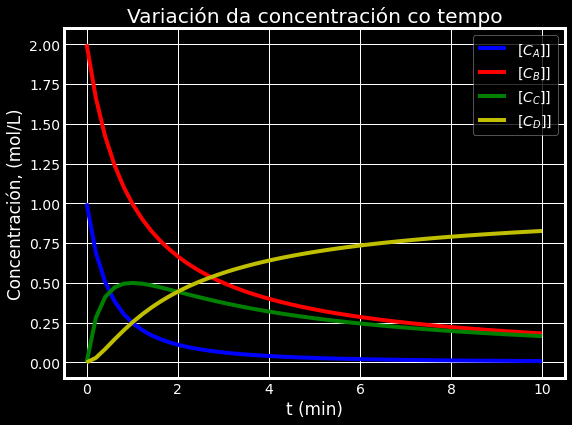

In [23]:
plt.figure(figsize=(8,6)) 
plt.style.use('tableau-colorblind10')
plt.plot(sol4.t,sol4.y[0],'b-',sol4.t,sol4.y[1],'r-',sol4.t,sol4.y[2],'g',sol4.t,sol4.y[3],'y')
plt.xlabel('t (min)')
plt.ylabel('Concentración, (mol/L)')
plt.title('Variación da concentración co tempo')
plt.legend(['[$C_A$]]','[$C_B$]]','[$C_C$]]','[$C_D$]]'])